# Solve BVPs with SciPy

There are not many boundary value problem solvers in Python, but SciPy offers one.

The boundary value problems in the `odezoo` can be plugged into SciPy's solver.

In [1]:
import inspect

import matplotlib.pyplot as plt
import scipy.integrate

from odezoo import backend, bvps

backend.select("numpy")

There are many kinds of boundary conditions.
One common distinction is between a two-point boundary condition $g_0(y(0)) = g_1(y(1)) = 0$ and a (general) boundary condition $g(y(0), y(1)) = 0$.
This tutorial covers both.


## General boundary conditions

We start with the more general case, because it is what SciPy's solver expects.

In [2]:
print(inspect.signature(scipy.integrate.solve_bvp))

(fun, bc, x, y, p=None, S=None, fun_jac=None, bc_jac=None, tol=0.001, max_nodes=1000, verbose=0, bc_tol=None)


Let's compute the solution of an example boundary value problem and plot the solution.

(t, u, /, mu, lmbda, eta, beta0) (u_left, u_right)


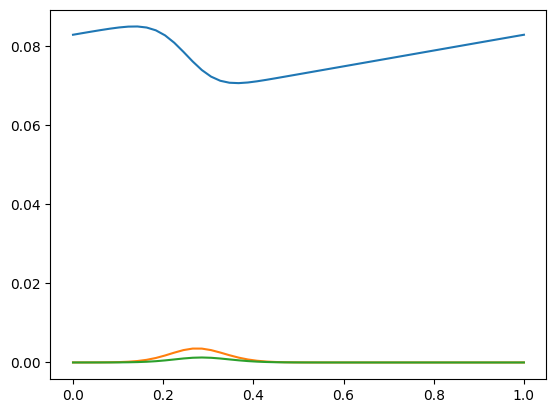

In [3]:
f, bc, tspan, f_args = bvps.measles()

print(inspect.signature(f), inspect.signature(bc))


def fun(t, y):
    return f(t, y, *f_args)


x = backend.numpy.linspace(*tspan, 50)
y = backend.numpy.ones((3, x.shape[0]))
sol = scipy.integrate.solve_bvp(fun=fun, bc=bc, x=x, y=y)


# Plotting grids
xs = backend.numpy.linspace(*tspan)
ys = sol.sol(xs).T


plt.plot(xs, ys)
plt.show()

## Two-point boundary conditions

Some boundary value problems have a boundary condition of the form $g_0(y(0)) = g_1(y(1)) = 0$, and the separability of the boundary conditions can often be exploited for faster solvers.

But if a solver expects non-separable conditions (like SciPy's solver), we can wrap them easily.
Note how many boundary value problems are second-order differential equations, and solvers like SciPy's often expect a first-order form.

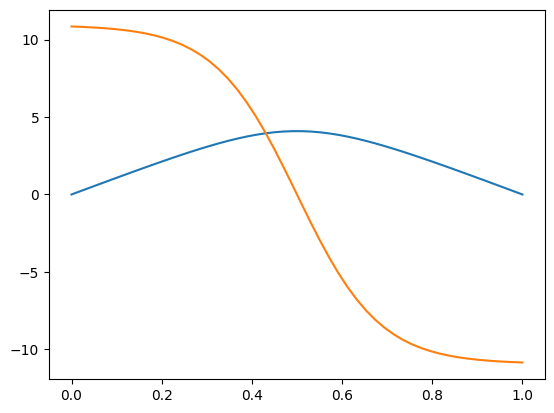

In [4]:
f, (g0, g1), tspan, f_args = bvps.bratu()

# split & concatenate to second-order ODEs as first-order ODEs


def fun(t, y):
    y, dy = backend.numpy.split(y, 2)
    ddy = f(y, *f_args)
    return backend.numpy.concatenate((dy, ddy))


def bc(y0, y1):
    y0, _ = backend.numpy.split(y0, 2)
    y1, _ = backend.numpy.split(y1, 2)
    return backend.numpy.concatenate((g0(y0), g1(y1)))


# Initial guess
x = backend.numpy.linspace(*tspan, 15)
y = backend.numpy.zeros((2, x.shape[0]))
y[0] += 3

sol = scipy.integrate.solve_bvp(fun=fun, bc=bc, x=x, y=y)

# Plotting grid
xs = backend.numpy.linspace(*tspan)
ys = sol.sol(xs).T

plt.plot(xs, ys)
plt.show()